<a href="https://colab.research.google.com/github/vaestrada/PortfolioProjectsMLE/blob/main/CIFAR_100_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 12s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')  # 100 output classes for CIFAR-100
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Display a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 4.0424 - accuracy: 0.0793 - val_loss: 3.5910 - val_accuracy: 0.1422
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 3.3764 - accuracy: 0.1875 - val_loss: 3.2013 - val_accuracy: 0.2209
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 3.0776 - accuracy: 0.2400 - val_loss: 3.1054 - val_accuracy: 0.2390
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 2.8882 - accuracy: 0.2745 - val_loss: 2.9118 - val_accuracy: 0.2756
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 2.7429 - accuracy: 0.3040 - val_loss: 2.7799 - val_accuracy: 0.3090
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 2.6381 - accuracy: 0.3282 - val_loss: 2.7321 - val_accuracy: 0.3171
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 2.5498 - accuracy: 0.3436 - val_loss: 2.6816 -

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc}")

313/313 [==============================] - 4s 13ms/step - loss: 2.5910 - accuracy: 0.3465

Test accuracy: 0.3465000092983246


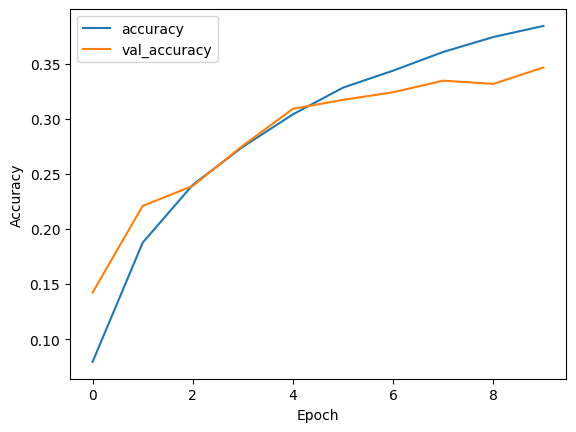

In [9]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Print the shapes of the training set and testing set
print("Training set shapes:")
print("Input images (x_train):", x_train.shape)
print("Labels (y_train):", y_train.shape)

print("\nTesting set shapes:")
print("Input images (x_test):", x_test.shape)
print("Labels (y_test):", y_test.shape)

Training set shapes:
Input images (x_train): (50000, 32, 32, 3)
Labels (y_train): (50000, 1)

Testing set shapes:
Input images (x_test): (10000, 32, 32, 3)
Labels (y_test): (10000, 1)


In [13]:
# Map class indices to class names for CIFAR-100
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
    'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

1/1 [==============================] - 0s 91ms/step


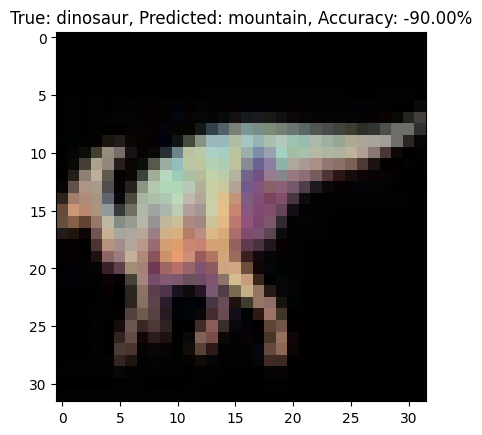

Predicted probabilities: [1.72861925e-04 4.75067049e-02 1.76822813e-03 1.42449588e-02
 7.73747824e-03 1.45653973e-03 4.09961533e-04 1.22971702e-04
 2.03003161e-04 3.68990656e-03 4.46386775e-03 2.99350964e-03
 3.42683634e-03 2.36466527e-04 4.30224376e-04 8.22198018e-03
 3.52264527e-04 3.43495910e-03 1.58258080e-02 2.32572504e-03
 1.09502282e-04 2.88194255e-03 6.83755009e-03 3.21386680e-02
 2.45452484e-05 2.16294527e-02 8.98751244e-03 1.63299255e-02
 4.25193971e-03 6.45650849e-02 7.30329147e-03 7.73804437e-04
 6.99206740e-02 1.57212969e-02 5.85144619e-03 1.09808124e-03
 5.83579717e-03 2.29882682e-03 3.14997253e-03 1.75266154e-03
 1.10109420e-02 1.79791678e-04 1.86837576e-02 1.17302989e-03
 1.76568665e-02 7.41019519e-03 1.73106994e-02 6.56836620e-03
 2.14919019e-05 9.99683738e-02 1.69335790e-02 3.64098400e-02
 4.36136143e-05 1.62309632e-04 2.47974023e-02 1.76952090e-02
 1.70766580e-04 5.17997367e-04 3.15521058e-04 1.17876811e-03
 8.92155746e-04 3.61316022e-04 3.32001643e-03 4.02913569e-03

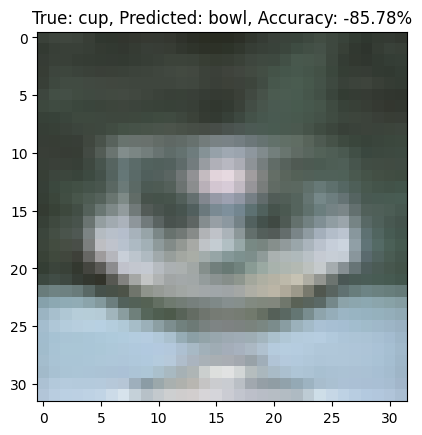

Predicted probabilities: [1.7728235e-04 2.6033011e-03 5.3980802e-03 8.7740715e-04 9.4993366e-03
 5.4841708e-02 2.6951169e-05 1.3418273e-03 2.7048189e-04 9.8446198e-04
 1.4224146e-01 6.1780228e-03 8.0809603e-04 3.1224422e-03 1.9182647e-03
 4.2931412e-04 1.2205329e-02 3.1677711e-05 1.6853142e-03 3.6592237e-04
 1.7738556e-02 3.3623388e-03 2.4541350e-02 2.3025454e-03 6.4691220e-04
 5.1937878e-02 2.3749966e-02 3.6006175e-02 1.6295817e-02 1.3453318e-04
 1.2334709e-02 3.0688545e-05 1.2527393e-02 3.5185242e-04 1.5747487e-04
 2.8917878e-03 4.5560468e-03 3.8810790e-04 6.2977005e-04 1.7323976e-02
 2.8637482e-03 5.3814561e-03 5.2491546e-04 1.3678354e-04 8.8449987e-03
 1.9665183e-03 1.8662361e-03 1.6196700e-05 1.9733595e-04 5.4738644e-05
 2.0781109e-02 2.1190237e-04 2.4298513e-06 8.0515556e-06 2.3326172e-04
 8.5962648e-03 4.4213148e-06 1.0945224e-04 2.0915350e-02 1.8660803e-04
 3.1802194e-06 5.7046495e-02 2.6377849e-04 9.8557221e-03 1.0613314e-02
 1.5598690e-02 5.9667663e-03 4.6591144e-02 2.7117808

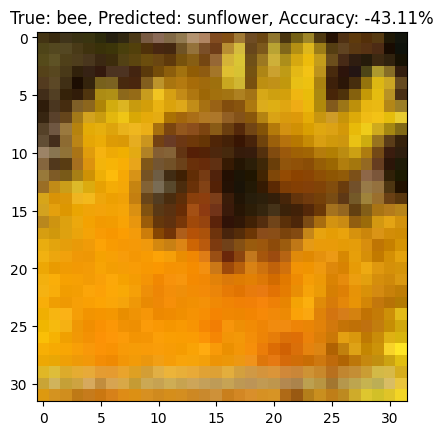

Predicted probabilities: [1.71981999e-04 6.22482039e-05 9.34141644e-05 2.22417384e-06
 1.61708194e-05 1.36996468e-03 1.36229277e-01 9.63413680e-04
 4.07152802e-05 3.97991110e-03 4.58810059e-03 9.40254249e-05
 1.44751211e-05 1.77487498e-04 5.63613363e-02 1.03152553e-04
 3.67260771e-03 1.30344449e-06 1.81724216e-04 1.73305583e-04
 6.61263539e-06 5.71090641e-06 2.86243856e-03 2.65653739e-06
 5.22074115e-04 1.31020881e-03 5.93921868e-04 2.04910557e-05
 8.60597065e-05 5.08376570e-06 1.03219156e-06 5.53621824e-08
 1.35387440e-04 8.50697048e-04 1.12860580e-05 4.36558003e-05
 1.66749815e-04 9.79380129e-05 5.00028864e-06 4.08867432e-04
 2.24192292e-04 3.54772608e-04 2.98144241e-05 1.03125596e-04
 8.53678430e-05 1.71632273e-03 1.75778841e-05 6.12189411e-04
 2.80006079e-05 1.13138613e-05 5.25621872e-04 1.25213031e-04
 2.05046919e-04 3.06545980e-02 3.88308283e-04 5.29666568e-06
 7.25881318e-06 1.20921107e-03 1.08226268e-05 4.54333320e-04
 2.12068771e-04 3.11704283e-03 9.29641649e-02 2.34702693e-05

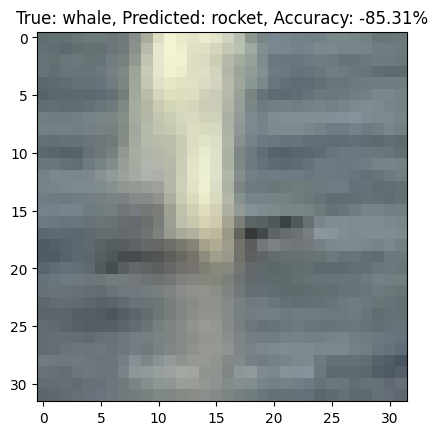

Predicted probabilities: [7.41805025e-06 2.97699735e-04 2.99504754e-04 3.40239238e-03
 9.69195855e-04 6.20658451e-04 4.89387785e-05 2.49541714e-04
 4.22624027e-04 8.51475168e-03 1.03404210e-03 1.53469897e-04
 1.01530617e-02 4.50314074e-05 5.44615359e-05 4.90243267e-03
 1.81719544e-03 1.32051820e-03 2.35779844e-02 7.86296208e-04
 4.66961967e-04 6.49025460e-05 1.10543019e-03 1.03036135e-01
 3.40601837e-04 5.51148877e-03 5.71508535e-05 3.04180346e-02
 2.80698352e-02 2.57411832e-03 7.55529180e-02 2.17410713e-03
 1.72956788e-03 6.96965028e-03 1.66416998e-04 9.25339336e-05
 9.69610483e-05 5.35555824e-04 4.69432864e-03 1.62057567e-03
 9.97481216e-03 3.93772876e-04 6.91213791e-05 1.83902273e-06
 2.86363568e-02 6.63524726e-04 4.07898653e-04 6.55656258e-05
 2.30345927e-06 3.55942082e-03 1.60679081e-03 3.41780222e-04
 7.61063939e-06 1.57581928e-06 1.77460758e-03 3.55282240e-02
 6.39305357e-03 2.69829470e-04 5.89820593e-05 3.05687473e-03
 1.55547820e-03 1.59212766e-04 1.29756008e-05 1.72270098e-04

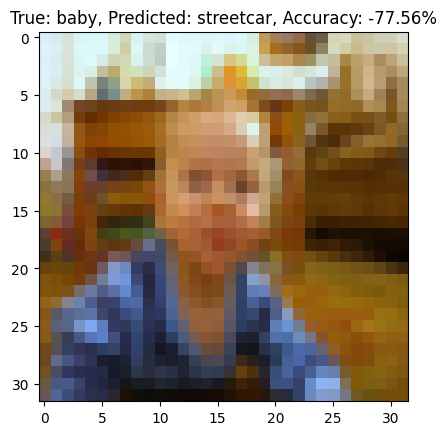

Predicted probabilities: [8.92685726e-04 1.18710694e-03 5.36440732e-03 4.78491449e-04
 1.43220555e-03 1.05901714e-02 3.47466819e-04 7.78510582e-07
 1.03586419e-02 4.88458667e-04 3.80447740e-03 9.18233488e-03
 6.02980051e-03 6.69711977e-02 2.77688378e-04 4.42375615e-03
 1.52159464e-02 4.07111980e-02 2.10802551e-04 1.98237337e-02
 5.65404189e-04 5.17054686e-05 1.40535645e-02 8.59988540e-06
 3.13041937e-06 4.42496724e-02 7.64137460e-03 8.01219576e-05
 9.19166268e-05 1.71571691e-03 2.88102137e-06 2.08335603e-03
 1.15218852e-02 2.80268546e-02 1.21544041e-02 1.32379541e-02
 6.15673745e-03 1.54929742e-01 3.51248978e-04 2.42454093e-02
 8.13769875e-04 1.95159533e-04 3.10534332e-03 1.29174336e-03
 5.03231822e-05 1.14647988e-02 1.17378291e-02 8.38006556e-04
 9.52602597e-04 3.42975225e-04 4.91145474e-04 9.96495876e-03
 1.21880403e-05 1.56569504e-03 3.41129722e-03 1.21910802e-04
 8.03149742e-05 7.04743492e-04 6.66882982e-03 8.80730731e-05
 2.96747712e-05 3.10129311e-04 4.31623979e-04 1.24058224e-05

In [16]:
# Plot a few test images alongside their predictions (with class names and accuracy)
num_images_to_plot = 5
selected_indices = np.random.choice(len(x_test), num_images_to_plot, replace=False)

for idx in selected_indices:
    test_image = x_test[idx]
    true_label = int(y_test[idx])  # Ensure true_label is a scalar value

    # Reshape the image for prediction (add batch dimension)
    test_image_reshaped = np.expand_dims(test_image, axis=0)

    # Predict the label for the test image
    predicted_probs = model.predict(test_image_reshaped)
    predicted_label = np.argmax(predicted_probs)
    predicted_class_name = class_names[predicted_label]
    true_class_name = class_names[true_label]

    # Calculate the accuracy of the prediction
    correct_prediction = (predicted_label == true_label)
    accuracy = np.max(predicted_probs) if correct_prediction else np.max(predicted_probs) - 1.0

    # Display the test image, true label, predicted label, and accuracy
    plt.imshow(test_image)
    plt.title(f'True: {true_class_name}, Predicted: {predicted_class_name}, Accuracy: {accuracy:.2%}')
    plt.show()
    print(f"Predicted probabilities: {predicted_probs.flatten()}")